# 📊 Customer Churn Analysis – Telecom Dataset

This project analyzes customer churn using Python, aiming to understand customer retention patterns. It explores various factors like demographics, tenure, contract type, and service usage to identify churn drivers.

**Key Libraries Used**: `Pandas`, `NumPy`, `Matplotlib`, `Seaborn`  
**Dataset**: [https://app.mavenanalytics.io/datasets?order=-fields.dateUpdated&search=telecom+customer+churn]  


## 📁 Dataset Overview and Preprocessing

- Loaded the dataset using `pandas`
- Removed unnecessary customer types (e.g., *Joined*)
- Checked for missing values and dataset shape
- Reset index for a clean view

Below is the basic structure and missing value analysis of the dataset.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv(r"telecom_customer_churn.csv")
print("Data Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())
df = df[df['Customer Status'].isin(['Stayed', 'Churned'])]
df.reset_index(drop=True, inplace=True)
df.head()

Data Shape: (7043, 38)

Columns: ['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']

Missing Values:
Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Co

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
print("Monthly Charge Stats:\n", df['Monthly Charge'].describe())
print("\nTotal Charges Stats:\n", df['Total Charges'].describe())
print("\nTenure Stats:\n", df['Tenure in Months'].describe())

Monthly Charge Stats:
 count    6589.000000
mean       65.030695
std        31.100727
min       -10.000000
25%        35.800000
50%        71.050000
75%        90.400000
max       118.750000
Name: Monthly Charge, dtype: float64

Total Charges Stats:
 count    6589.000000
mean     2432.042243
std      2265.500080
min        18.850000
25%       544.550000
50%      1563.900000
75%      4003.000000
max      8684.800000
Name: Total Charges, dtype: float64

Tenure Stats:
 count    6589.000000
mean       34.499772
std        23.968734
min         1.000000
25%        12.000000
50%        32.000000
75%        57.000000
max        72.000000
Name: Tenure in Months, dtype: float64


## 📊 Churned vs. Retained Customers

This section visualizes the distribution of churned and retained customers using bar and pie charts.


Customer Status
Stayed     4720
Churned    1869
Name: count, dtype: int64


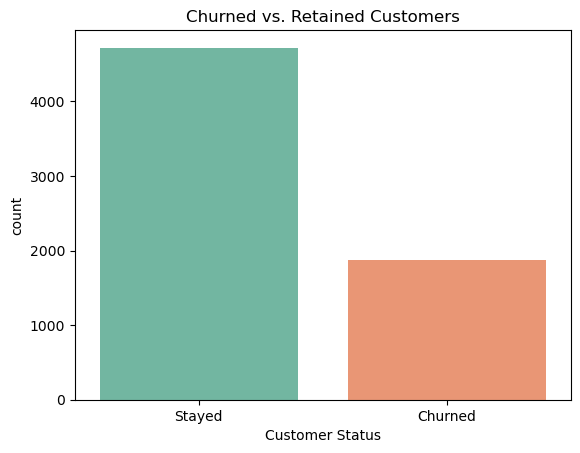

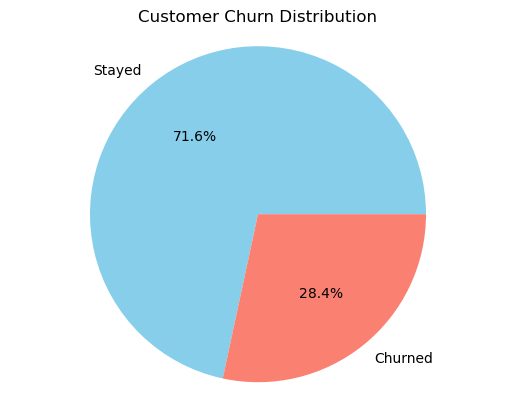

In [11]:
#1. Analyze the Distribution of Churned vs. Retained Customers
churn_counts = df['Customer Status'].value_counts()
print(churn_counts)

# Bar plot
sns.countplot(x='Customer Status', data=df, palette='Set2')
plt.title('Churned vs. Retained Customers')
plt.show()

# Pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()

## 👥 Demographics and Churn

Analyzing churn distribution across demographic categories:  
- Gender  
- Marital Status  
- Tenure (via violin plot)  
- Contract type (via boxplot)


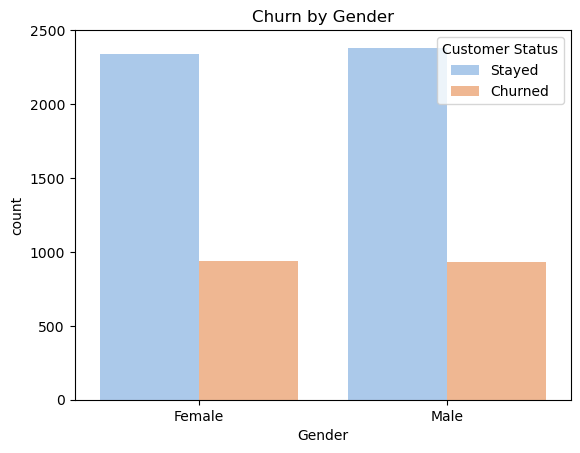

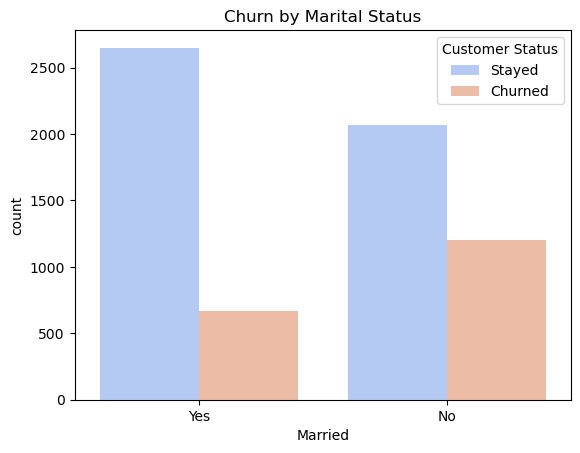

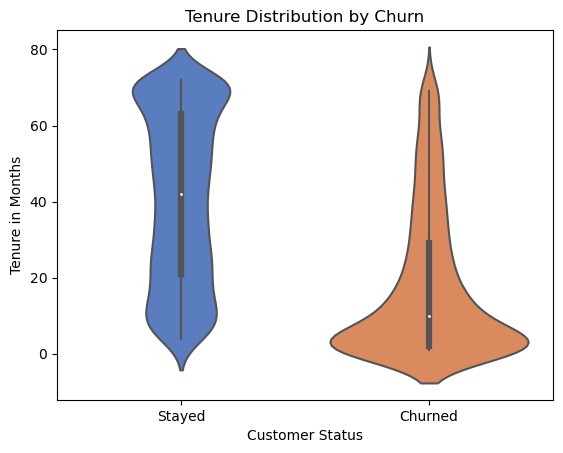

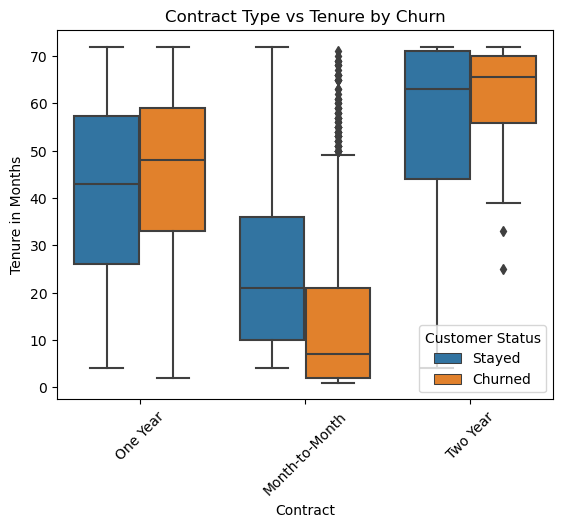

In [12]:
#2. Explore Demographic and Subscription-Based Factors
# Gender vs Churn
sns.countplot(x='Gender', hue='Customer Status', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.show()

# Married vs Churn
sns.countplot(x='Married', hue='Customer Status', data=df, palette='coolwarm')
plt.title('Churn by Marital Status')
plt.show()

# Violin plot for tenure
sns.violinplot(x='Customer Status', y='Tenure in Months', data=df, palette='muted')
plt.title('Tenure Distribution by Churn')
plt.show()

# Boxplot for Contract types
sns.boxplot(x='Contract', y='Tenure in Months', hue='Customer Status', data=df)
plt.xticks(rotation=45)
plt.title('Contract Type vs Tenure by Churn')
plt.show()

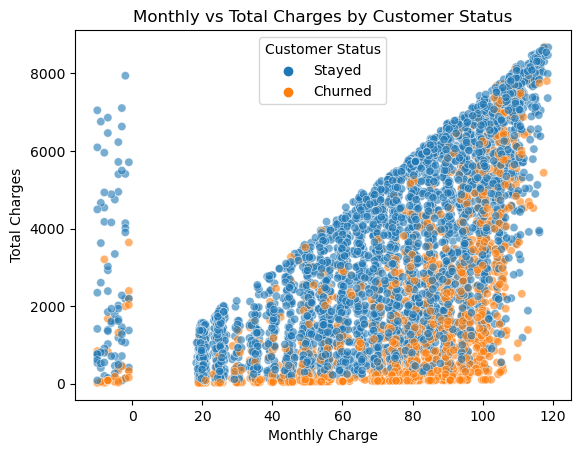

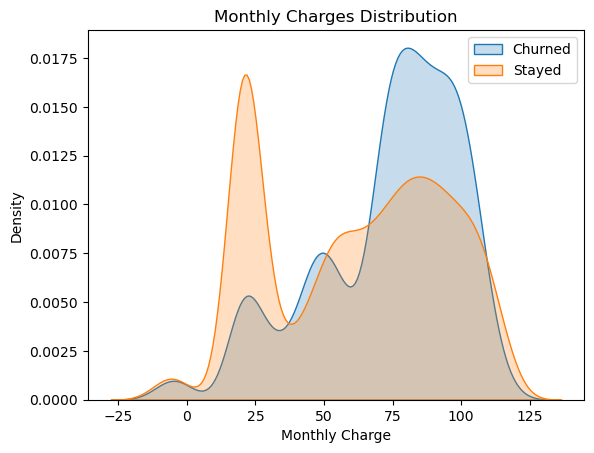

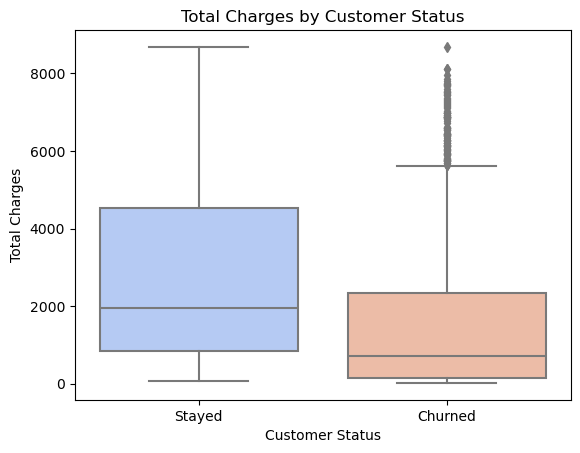

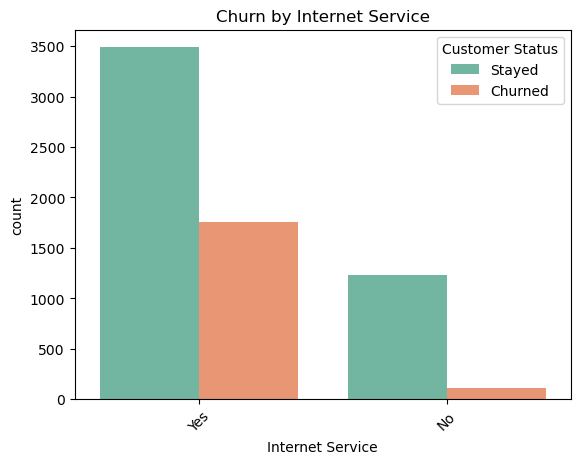

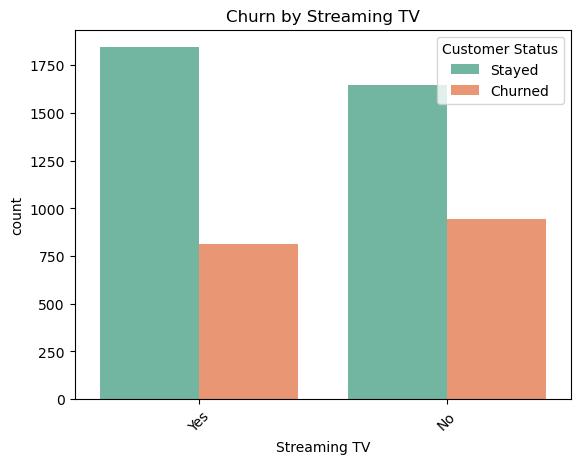

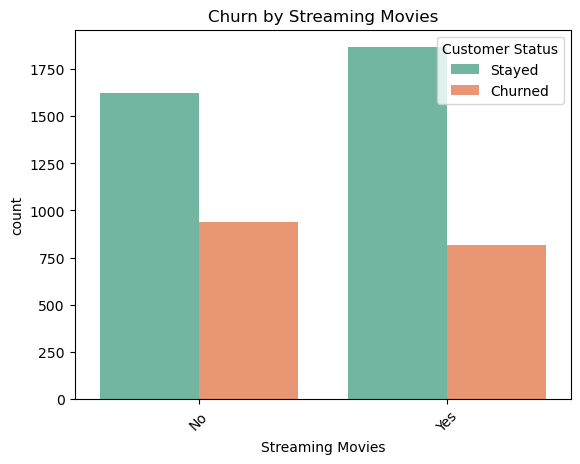

In [13]:
#3. Investigate Financial and Service Usage Patterns

# Drop rows with missing Total Charges for accurate scatter plot
df_clean = df.dropna(subset=['Total Charges'])

# Scatter plot: Monthly vs Total Charges
sns.scatterplot(x='Monthly Charge', y='Total Charges', hue='Customer Status', data=df_clean, alpha=0.6)
plt.title('Monthly vs Total Charges by Customer Status')
plt.show()

# KDE plot: Monthly Charges
sns.kdeplot(data=df[df['Customer Status'] == 'Churned']['Monthly Charge'], label='Churned', fill=True)
sns.kdeplot(data=df[df['Customer Status'] == 'Stayed']['Monthly Charge'], label='Stayed', fill=True)
plt.title('Monthly Charges Distribution')
plt.legend()
plt.show()

# Boxplot for Total Charges
sns.boxplot(x='Customer Status', y='Total Charges', data=df_clean, palette='coolwarm')
plt.title('Total Charges by Customer Status')
plt.show()# Drop rows with missing Total Charges

# Churn by service features
service_features = ['Internet Service', 'Streaming TV', 'Streaming Movies']
for feature in service_features:
    sns.countplot(x=feature, hue='Customer Status', data=df, palette='Set2')
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
    plt.show()

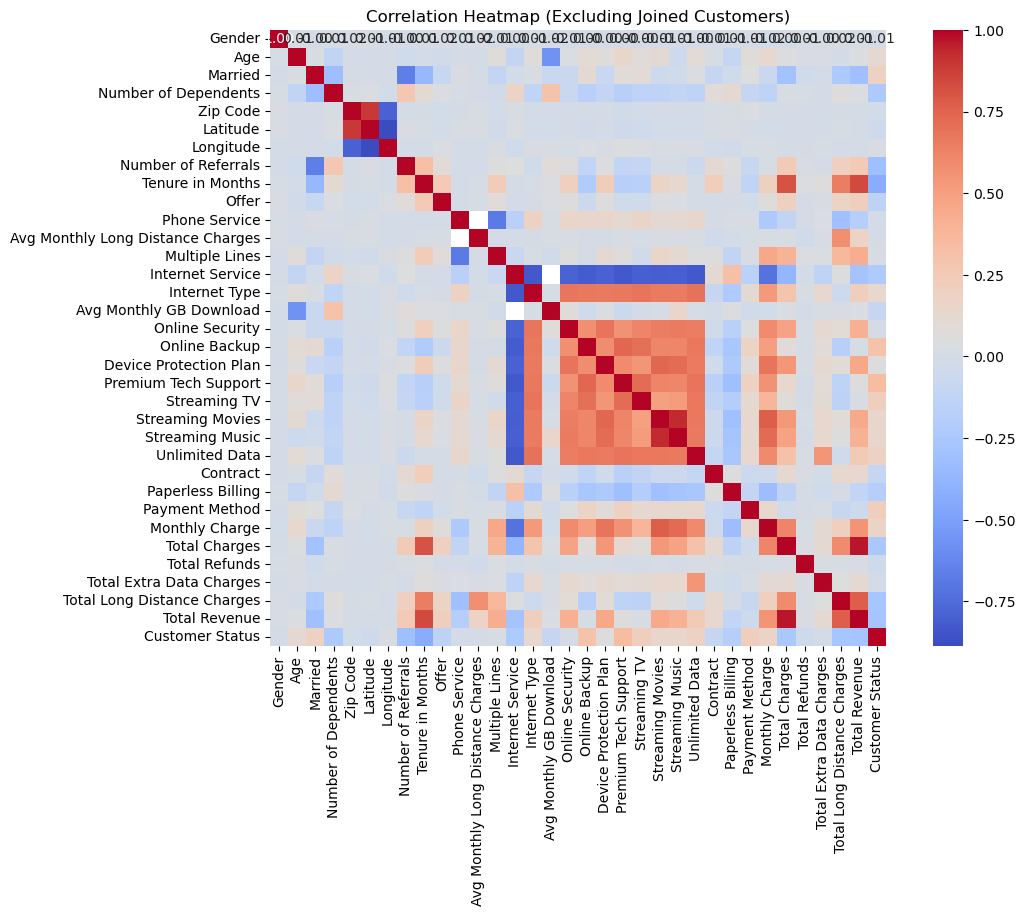


 Top correlations with 'Customer Status':

Customer Status                      1.000000
Premium Tech Support                 0.340860
Online Backup                        0.302242
Streaming TV                         0.214154
Payment Method                       0.213091
Unlimited Data                       0.193174
Married                              0.183273
Monthly Charge                       0.168290
Streaming Movies                     0.145033
Streaming Music                      0.139058
Internet Type                        0.134057
Age                                  0.111174
Device Protection Plan               0.061903
Longitude                            0.025455
Multiple Lines                       0.016951
Online Security                      0.001715
Total Extra Data Charges            -0.000259
Avg Monthly Long Distance Charges   -0.000467
Gender                              -0.006373
Phone Service                       -0.014369
Zip Code                            

In [14]:
#4. Check Correlations Between Features

# Encode categorical columns
df_encoded = df.copy()
# Drop irrelevant columns
df_encoded = df.drop(['Customer ID', 'City', 'Churn Reason', 'Churn Category'], axis=1, errors='ignore')

# Encode target column (Customer Status): Churned = 1, Stayed = 0
df_encoded['Customer Status'] = df_encoded['Customer Status'].map({'Churned': 1, 'Stayed': 0})

# Encode remaining categorical features using pd.factorize
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Excluding Joined Customers)')
plt.show()

# Print top correlations with Churn
print("\n Top correlations with 'Customer Status':\n")
print(corr_matrix['Customer Status'].sort_values(ascending=False))

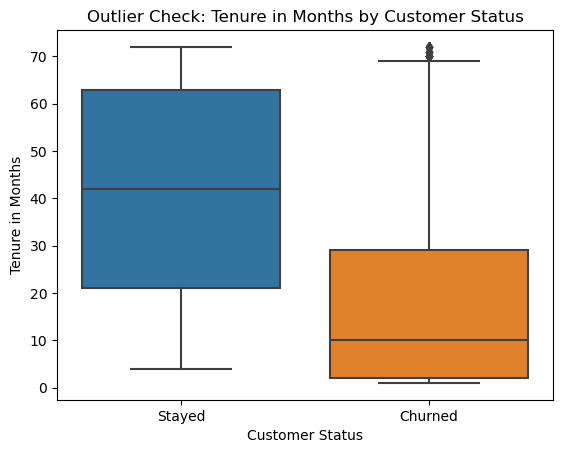

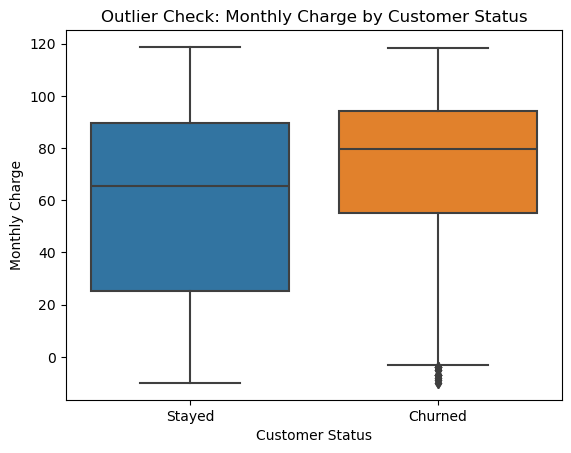

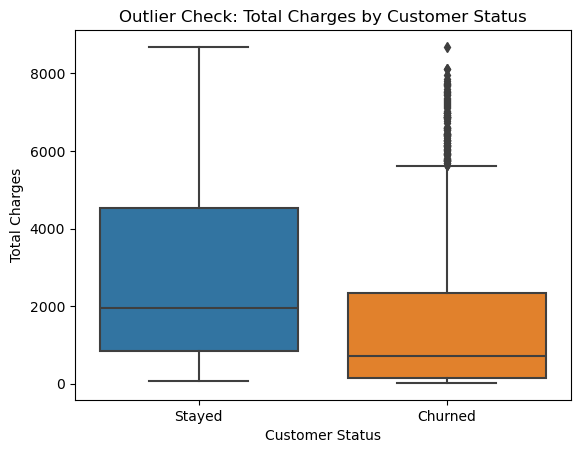

Tenure in Months: Found 0 potential outliers.
Monthly Charge: Found 0 potential outliers.
Total Charges: Found 0 potential outliers.


In [15]:
#5. Detect Anomalies and Outliers in Customer Behavior

# Boxplots for outlier detection
num_cols = ['Tenure in Months', 'Monthly Charge', 'Total Charges']

# Box plots to check outliers visually
for col in num_cols:
    sns.boxplot(x='Customer Status', y=col, data=df)
    plt.title(f'Outlier Check: {col} by Customer Status')
    plt.show()

# IQR method to identify outliers numerically
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: Found {len(outliers)} potential outliers.")


## 📌 Key Takeaways

- Customers with shorter tenure and higher charges are more likely to churn.
- Streaming services and contract types play a major role in customer behavior.
- Month-to-month contracts show higher churn.

### ✅ Next Steps:
- Build a churn prediction model (Logistic Regression / Random Forest)
- Optimize retention strategies for high-risk customers

Thanks for reading!
